In [1]:
import numpy as np
import numpy.linalg as la
import scipy.sparse as sps
import scipy.sparse.linalg as spsla
import time
import util, template
import matplotlib.pyplot as plt

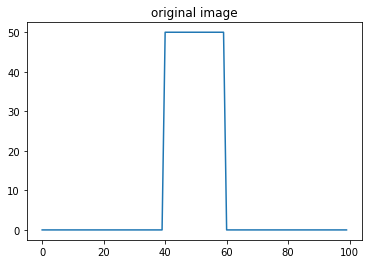

In [2]:
## setup problem
# dimensions
n = 100  # number of pixels in image space
m = n    # number of pixels in data space
k = 100  # number of pixels in ROI

# sparsity and regularization
sparse = True
iden = sps.eye
B = iden(n)
lam = 1

# gaussian blur parameters
sigma = 3
t = 10

# load 1D image
fname = 'tomo1D/f_impulse_100.npy'
f = np.load(fname)

plt.plot(f)
plt.title("original image")
plt.show()

((100, 100), 'Kb')
((100, 100), 'X')
((100, 100), 'M')


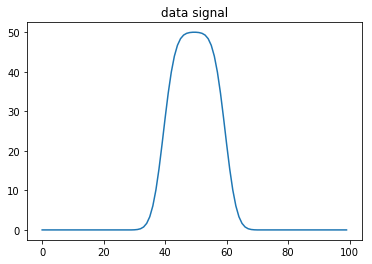

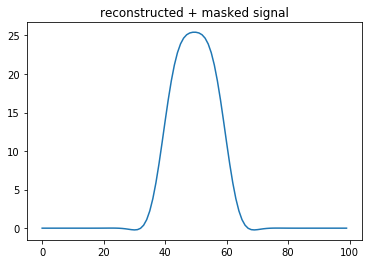

In [3]:
## generate problem
# generate instance
K_diag = np.ones(m)
Kb, X, M = util.gen_instance_1d(m=m, n=n, k=k, K_diag=K_diag, sigma=sigma, t=t, sparse=sparse)
print(Kb.shape, "Kb")
print(X.shape, "X")
print(M.shape, "M")

# compute reconstruction
R = template.direct_rxn(X=X, lam=lam, B=B, sparse=sparse)

# compute blurred image (data signal)
sb = X.dot(f)

plt.plot(sb)
plt.title("data signal")
plt.show()

# compute reconstructed / masked image (rxn signal)
sx = M.dot(R).dot(sb)

plt.plot(sx)
plt.title("reconstructed + masked signal")
plt.show()


((100, 100), 'MR')
((100, 100), 'Kb')
((100, 100), 'Kx')


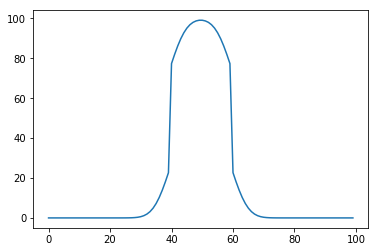

In [4]:
w, Kx, sx = template.direct_solve(Kb=Kb, R=R, M=M, lam=lam, B=B, sb=sb, sparse=True)
print(Kx.shape, "Kx")
plt.plot(w)
plt.show()